In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cvxopt

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

In [3]:
Xf = np.matrix([[ 164.939, 163.431, 157.554, 152.785, 156.385, 159.242, 156.281, 164.411, 157.308, 159.579 ],
                [  56.927,  48.945,  45.678,  45.969,  40.896,  46.848,  42.225,  42.380,  42.150,  49.739 ]]).T;
Xm = np.matrix([[ 168.524, 171.597, 179.469, 176.063, 180.939, 177.011, 183.284, 180.549, 176.502, 185.392 ],
                [  64.353,  61.793,  74.552,  69.851,  74.730,  75.871,  79.170,  79.753,  64.923,  73.665 ]]).T;
X = np.concatenate([Xf, Xm],0);
y = np.concatenate([-np.matrix(np.ones([10,1])),np.matrix(np.ones([10,1]))]);

In [4]:
print(X.shape)
print(y.shape)

(20, 2)
(20, 1)


In [5]:
Q = np.eye(3);
Q[2,2] = 0;
c = np.zeros([3])
A = np.multiply(np.tile(-y,[1, 3]), np.concatenate([X, np.ones([20,1])],1))
b = -np.ones([20])
x = cvxopt_solve_qp(Q, c, A, b);
w = np.matrix([[x[0]],[x[1]]]);
b = x[2];
scale = np.linalg.norm(w);
w = w / scale;
b = b / scale;
print('Optimal w: [%f %f] b: %f' % (w[0,0],w[1,0],b));

     pcost       dcost       gap    pres   dres
 0:  1.4721e-03  6.5053e+00  5e+01  2e+00  4e+02
 1:  1.0012e-02 -4.7161e+00  1e+01  6e-01  1e+02
 2:  2.6180e-02 -4.8172e+00  7e+00  2e-01  6e+01
 3:  3.9767e-02 -4.5363e-01  5e-01  1e-02  2e+00
 4:  3.5404e-02  1.8200e-02  2e-02  4e-15  3e-13
 5:  3.1392e-02  3.0877e-02  5e-04  6e-15  1e-12
 6:  3.1250e-02  3.1245e-02  5e-06  3e-15  4e-13
 7:  3.1249e-02  3.1248e-02  5e-08  4e-15  2e-13
Optimal solution found.
Optimal w: [0.640061 0.768324] b: -153.309495


In [6]:
# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(-np.ones(num_sample),np.ones(num_sample))[:,np.newaxis]

In [7]:
print(X.shape)
print(y.shape)

(200, 2)
(200, 1)


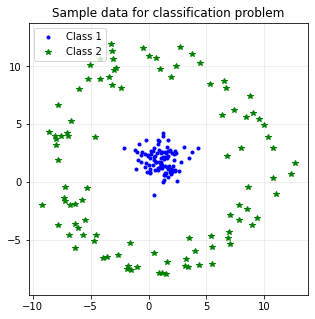

In [8]:
# Plot the data
fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend(loc=2)
plt.axis('equal')
plt.show()

In [9]:
Q = np.eye(3);
Q[2,2] = 0;
c = np.zeros([3])
A = np.multiply(np.tile(-y,[1, 3]), np.concatenate([X, np.ones([200,1])],1))
b = -np.ones([200])

try:
    x = cvxopt_solve_qp(Q, c, A, b);
    w = np.matrix([[x[0]],[x[1]]]);
    b = x[2];
    scale = np.linalg.norm(w);
    w = w / scale;
    b = b / scale;
    print('Optimal w: [%f %f] b: %f' % (w[0,0],w[1,0],b));
except Exception as e:
    print(e)

     pcost       dcost       gap    pres   dres
 0:  2.9164e-04  1.9763e+02  2e+02  2e+00  8e-14
 1:  2.6953e-08  4.4329e+02  6e+00  1e+00  4e-14
 2:  2.5498e-12  3.6065e+04  5e+00  1e+00  1e-11
 3:  2.5481e-16  2.8476e+08  4e+02  1e+00  4e-08
 4:  2.5481e-20  2.2477e+14  3e+06  1e+00  4e-02
 5:  2.5482e-24  1.7742e+22  2e+12  1e+00  4e+06
 6:  9.2759e-27  1.3814e+32  4e+20  1e+00  1e+16
 7:  5.6713e-26  1.8247e+40  5e+28  1e+00  3e+24
 8:  6.9104e-26  1.1357e+47  3e+35  1e+00  1e+31
 9:  3.1360e-26  4.2772e+54  1e+43  1e+00  2e+38
10:  4.9953e-26  7.1312e+61  2e+50  1e+00  1e+46
11:  3.8092e-26  3.9958e+69  1e+58  1e+00  5e+53
12:  5.9235e-26  6.1388e+76  2e+65  1e+00  1e+61
13:  5.9586e-26  1.4389e+84  4e+72  1e+00  3e+68
14:  5.6118e-26  3.2949e+91  1e+80  1e+00  8e+75
15:  5.7554e-26  9.2055e+98  3e+87  1e+00  2e+83
16:  5.5884e-26  5.1754e+105  2e+94  1e+00  1e+90
17:  6.0083e-26  1.2365e+113  4e+101  1e+00  2e+97
18:  5.9717e-26  8.8754e+119  3e+108  1e+00 2e+104
19:  4.7549e-26 

In [10]:
Xf = np.matrix([[ 164.939, 163.431, 157.554, 152.785, 156.385, 159.242, 156.281, 164.411, 157.308, 159.579 ],
                [  56.927,  48.945,  45.678,  45.969,  40.896,  46.848,  42.225,  42.380,  42.150,  49.739 ]]).T;
Xm = np.matrix([[ 168.524, 171.597, 179.469, 176.063, 180.939, 177.011, 183.284, 180.549, 176.502, 185.392 ],
                [  64.353,  61.793,  74.552,  69.851,  74.730,  75.871,  79.170,  79.753,  64.923,  73.665 ]]).T;
X = np.concatenate([Xf, Xm],0);
y = np.concatenate([-np.matrix(np.ones([10,1])),np.matrix(np.ones([10,1]))]);

In [11]:
# Transform data set so that each attribute has a
# mean of 0 and a standard deviation of 1

def plot_mf(Xf,Xm):
    axes = plt.axes()
    females_series = plt.scatter(np.array(Xf[:,0]), np.array(Xf[:,1]), s=30, c='b', marker='o', label='Females')
    males_series = plt.scatter(np.array(Xm[:,0]), np.array(Xm[:,1]), s=30, c='y', marker='o', label='Males')
    axes.set_aspect('equal', 'datalim')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title('Height-weight data for males and females (fake data!)')
    plt.legend(handles=[females_series, males_series], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    return axes

def preprocess(X):
    means = X.mean(0);
    scales = 1/np.std(X,0);
    Xh = np.concatenate([X.T,np.ones([1,20])],0);
    Tm = np.matrix(np.eye(3));
    Tm[0:2,2:3] = -X.mean(0).T;
    Ts = np.matrix(np.eye(3));
    Ts[0:2,0:2] = np.diagflat(scales);
    T = Ts*Tm;
    XX = (T * Xh);
    XX = XX[0:2,:].T;
    return XX, T;

def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]).reshape(1,-1) @ (X[i,:] - X[j,:]).reshape(-1,1)
    K = np.exp(-K/(2*sigma*sigma))      
    return K;

def linear_kernel(X):
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:].reshape(1,-1)@X[j,:].reshape(-1,1))
    return K;

def get_wb(X, y, alpha):
    # Find the support vectors
    S = alpha > 1e-6
    XS = X[S,:]
    yS = y[S]
    alphaS = alpha[S]
    alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, n)
    w = sum(np.multiply(alphaSyS, XS)).T
    # Find b
    KS = K[S,:][:,S]
    NS = yS.shape[0]
    b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
    # Normalize w,b
    scalef = np.linalg.norm(w)
    w = w / scalef
    b = b / scalef
    return w,b

def plot_w(w,b):
    ylim = plt.axes().get_ylim()
    xlim = plt.axes().get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')
    

Q rank: 2
     pcost       dcost       gap    pres   dres
 0: -2.7646e+00 -4.9725e+00  5e+01  6e+00  2e+00
 1: -6.4101e+00 -3.8299e+00  1e+01  2e+00  6e-01
 2: -5.0055e+00 -1.2719e+00  7e+00  8e-01  2e-01
 3: -5.1552e-02 -4.0648e-02  5e-01  3e-02  1e-02
 4: -1.8200e-02 -3.5404e-02  2e-02  5e-18  4e-13
 5: -3.0877e-02 -3.1392e-02  5e-04  8e-18  1e-13
 6: -3.1245e-02 -3.1250e-02  5e-06  9e-18  3e-13
 7: -3.1248e-02 -3.1249e-02  5e-08  6e-18  2e-13
Optimal solution found.
Optimal alpha:
[3.12484796e-02 1.13821985e-09 7.68004003e-10 6.22346942e-10
 6.43114906e-10 8.93974184e-10 6.60695980e-10 4.31409827e-10
 6.68557407e-10 1.19689394e-09 1.56332821e-02 1.56151999e-02
 5.00606721e-10 6.71834910e-10 4.89168002e-10 4.93113729e-10
 4.90935291e-10 4.85894509e-10 9.54348935e-10 4.42078646e-10]
(2, 1)
Optimal w: [0.640062,0.768324] b: -153.309583


/home/rom/Desktop/AIT/ML/lib/python3.6/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/rom/Desktop/AIT/ML/lib/python3.6/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


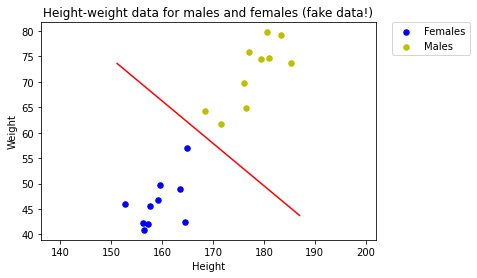

In [12]:
m = X.shape[0];
n = X.shape[1];

# Linear kernel below. We might also try
# XX, T = preprocess(X)
# K = gauss_kernel(XX)

K = linear_kernel(X);

Q = np.multiply(y * y.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m]);
A = -np.eye(m);
b = np.zeros([m]);
E = y.T;
d = np.zeros(1);
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
print("Optimal alpha:")
print(alpha_star)

w,b = get_wb(X, y, alpha_star)

print(w.shape)

print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
plot_mf(Xf,Xm)


plot_w(w,b)

In [13]:
def predict_linear(X,w,b):
    s = X@w+b
    s[s >= 0] = 1
    s[s < 0] = -1
    return s
y_pred = predict_linear(X,w,b)
accuracy = np.sum(y_pred==y)/y.size
print(accuracy)

1.0


In [14]:
# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(-np.ones(num_sample),np.ones(num_sample))[:,np.newaxis]

In [15]:
m = X.shape[0];
n = X.shape[1];

In [16]:
# Linear kernel below. We might also try
# XX, T = preprocess(X)
# K = gauss_kernel(XX)

K = linear_kernel(X);

Q = np.multiply(y * y.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m]);
A = -np.eye(m);
b = np.zeros([m]);
E = y.T;
d = np.zeros(1);
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
print("Optimal alpha:")
print(alpha_star)

try:
    w,b = get_wb(X, y, alpha_star)

    print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
    plot_mf(Xf,Xm)
    plot_w(w,b)
except Exception as e:
    print(e)

Q rank: 2
     pcost       dcost       gap    pres   dres
 0: -1.9950e+02 -4.2109e+02  2e+02  9e-14  2e+00
 1: -4.7086e+02 -4.7611e+02  5e+00  8e-14  1e+00
 2: -4.2739e+04 -4.2744e+04  5e+00  1e-11  1e+00
 3: -3.7434e+08 -3.7435e+08  9e+02  9e-08  1e+00
 4: -4.5843e+08 -4.5843e+08  1e+03  8e-09  1e+00
Terminated (singular KKT matrix).
Optimal alpha:
None
'>' not supported between instances of 'NoneType' and 'float'


In [17]:
# Linear kernel below. We might also try
# XX, T = preprocess(X)
# K = gauss_kernel(XX)

K = gauss_kernel(X);

Q = np.multiply(y * y.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m]);
A = -np.eye(m);
b = np.zeros([m]);
E = y.T;
d = np.zeros(1);
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
print("Optimal alpha:")
print(alpha_star)

w,b = get_wb(X, y, alpha_star)
w = w.reshape(-1,1)
print(w.shape)

print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))

Q rank: 200
     pcost       dcost       gap    pres   dres
 0: -4.7407e+01 -1.3372e+02  9e+01  1e-14  2e+00
 1: -5.4301e+01 -6.2393e+01  8e+00  1e-14  3e-01
 2: -5.6861e+01 -5.8521e+01  2e+00  8e-15  4e-02
 3: -5.6994e+01 -5.7285e+01  3e-01  1e-14  6e-03
 4: -5.7022e+01 -5.7048e+01  3e-02  3e-14  3e-04
 5: -5.7026e+01 -5.7027e+01  8e-04  2e-14  8e-06
 6: -5.7027e+01 -5.7027e+01  3e-05  3e-14  1e-07
 7: -5.7027e+01 -5.7027e+01  2e-06  5e-15  1e-09
Optimal solution found.
Optimal alpha:
[1.19601724e-08 5.98521245e-01 5.43537678e-01 1.16130539e+00
 8.97423363e-01 1.07670334e+00 1.22691147e+00 4.51762445e-01
 1.03286002e+00 1.35539750e+00 2.64740546e-01 7.51277036e-01
 1.35549115e+00 6.39533286e-01 9.18104812e-09 5.39419655e-01
 6.42978002e-01 4.65284010e-01 7.42171453e-01 6.90892323e-01
 7.71950474e-01 6.96250161e-01 5.59916342e-01 9.85108772e-01
 1.11194626e+00 2.25788208e-01 3.56676487e-01 4.17004033e-01
 1.35549296e+00 4.08819262e-01 1.62841343e-01 5.08846421e-01
 1.07454665e-02 8.894

In [18]:
def predict(x,X,y,alpha):
    s = []
    sigma = 0.2
    for j in range(x.shape[0]):
        ss = 0
        for i in range(X.shape[0]):
            ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
        s.append(ss)
    s = np.array(s)
    s[s >= 0] = 1
    s[s < 0] = -1
    return s
    
y_pred = predict(X,X,y,alpha_star)
np.sum(y == y_pred)/y.size

1.0

In [19]:
x_series = np.linspace(-15,15,100)
y_series = np.linspace(-15,15,100)

x_mesh,y_mesh = np.meshgrid(x_series,y_series)

x_mesh = x_mesh.reshape(-1,1)
y_mesh = y_mesh.reshape(-1,1)

mesh = np.append(x_mesh,y_mesh,axis=1)
y_pred = predict(mesh,X,y,alpha_star)

x_mesh = x_mesh.reshape(100,100)
y_mesh = y_mesh.reshape(100,100)
y_pred = y_pred.reshape(100,100)

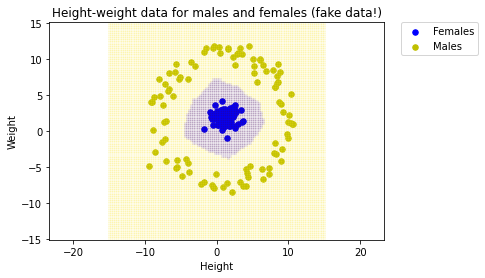

In [20]:

#plt.scatter(mesh[:,0],mesh[:,1],c=y_pred)
plot_mf(X1,X2)
plt.pcolormesh(x_mesh,y_mesh,y_pred,cmap='viridis',shading='auto',alpha=0.1)